In [85]:
# (1)데이터 가져오기

from sklearn.datasets import load_diabetes
diabetes=load_diabetes() # diabetes 데이터 가져오기
df_X = diabetes.data # diabetes.data df_X에 저장
df_y = diabetes.target # diabetes.target df_y에 저장
print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


In [86]:
import numpy as np

In [87]:
# (2)모델에 입력할 데이터 X 준비하기
# (3)모델에 예측할 데이터 y 준비하기

X = np.array(df_X) # df_X값 X에 numpy array로 저장
y = np.array(df_y) # df_y값 y에 numpy array로 저장
print(type(X), type(y)) # 타입 확인

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [88]:
# (4) train 데이터와 test 데이터로 분리하기

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [89]:
# (5) 모델 준비하기
# 가중치 준비
W = np.random.rand(10)
b = np.random.rand()

In [90]:
# model 함수 구현
def model(X, W, b):
    pred = 0
    for i in range(10):
        pred += X[:, i]*W[i]
    pred += b
    return pred

In [91]:
# (6) 손실함수 loss 정의하기

def MSE(a, b):
    mse = ((a-b)**2).mean()
    return mse

def loss(X, W, b, y):
    pred = model(X, W ,b)
    L = MSE(pred, y)
    return L

In [92]:
# (7) 기울기를 구하는 gradient 함수 구현하기
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [102]:
# (8) 하이퍼 파라미터인 학습률 설정하기
LEARNIG_RATE = 0.3

In [103]:
# (9) 모델 학습하기
losses = []

for i in range(1, 1001):
    dW, db = gradient(x_train, W, b, y_train)
    W -= LEARNIG_RATE * dW
    b -= LEARNIG_RATE * db
    L = loss(x_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print(f'Iteration {i} : Loss {L:.4f}')

Iteration 10 : Loss 2864.5950
Iteration 20 : Loss 2864.2180
Iteration 30 : Loss 2863.8498
Iteration 40 : Loss 2863.4902
Iteration 50 : Loss 2863.1390
Iteration 60 : Loss 2862.7959
Iteration 70 : Loss 2862.4609
Iteration 80 : Loss 2862.1336
Iteration 90 : Loss 2861.8139
Iteration 100 : Loss 2861.5016
Iteration 110 : Loss 2861.1965
Iteration 120 : Loss 2860.8984
Iteration 130 : Loss 2860.6072
Iteration 140 : Loss 2860.3227
Iteration 150 : Loss 2860.0447
Iteration 160 : Loss 2859.7730
Iteration 170 : Loss 2859.5076
Iteration 180 : Loss 2859.2482
Iteration 190 : Loss 2858.9947
Iteration 200 : Loss 2858.7470
Iteration 210 : Loss 2858.5048
Iteration 220 : Loss 2858.2682
Iteration 230 : Loss 2858.0369
Iteration 240 : Loss 2857.8108
Iteration 250 : Loss 2857.5898
Iteration 260 : Loss 2857.3738
Iteration 270 : Loss 2857.1626
Iteration 280 : Loss 2856.9561
Iteration 290 : Loss 2856.7542
Iteration 300 : Loss 2856.5569
Iteration 310 : Loss 2856.3639
Iteration 320 : Loss 2856.1752
Iteration 330 : L

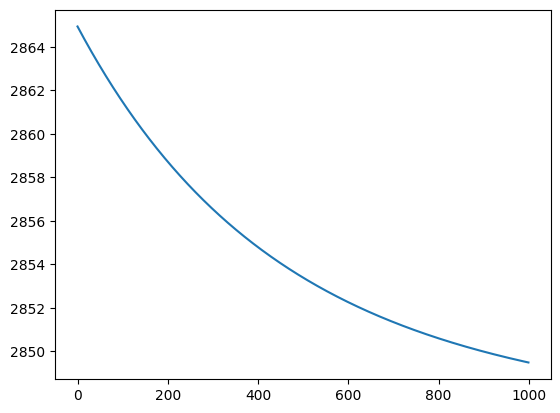

In [104]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [105]:
# (10) test 데이터에 대한 성능 확인하기
pred = model(x_test, W, b)
mse = loss(x_test, W, b, y_test)
mse

3035.0723934571306

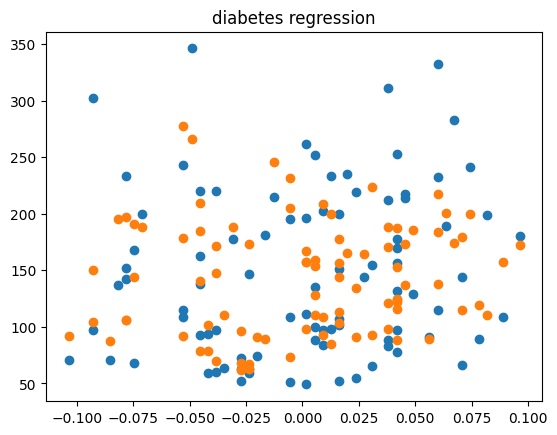

In [106]:
# (11) 정답 데이터와 예측한 데이터 시각화하기

plt.scatter(x_test[:,0], y_test)
plt.scatter(x_test[:,0], pred)
title = plt.title('diabetes regression')
plt.show()